# Default Values for Matplotlib's "inline" backend

[back to overview page](index.ipynb)

<div class="alert alert-info">

Make sure to use at least version 0.1.6 of the `matplotlib-inline` package
(which is an automatic dependency of the `ipython` package).

</div>

By default, the plots created with the "inline" backend have the wrong size.
More specifically, PNG plots (the default) will be slightly larger than SVG plots
(see below for an example).

This can be fixed easily by creating a file named `matplotlibrc`
(in the directory where your Jupyter notebooks live)
and adding the following line:

    figure.dpi: 96

If you are using Git to manage your files,
don't forget to commit this local configuration file to your repository.
Different directories can have different local configurations.
If a given configuration should apply to multiple directories,
symbolic links can be created in each directory.

For more details about `matplotlibrc` files, have a look at the
[Matplotlib docs](https://matplotlib.org/stable/tutorials/introductory/customizing.html#the-matplotlibrc-file).

If you want to use SVG plots by default (or if you want to use PDF plots for nicer PDF exports), read the section [Changing the Default Format](#Changing-the-Default-Format) below.

If you are using `nbsphinx` to publish your notebooks, have a look at https://nbsphinx.readthedocs.io/code-cells.html#Plots for how to use SVG and PDF plots.

This is all you really need to know, but if you want to read about a few more details, just keep reading.

You might also be interested in [Getting Started with Matplotlib](matplotlib.ipynb).

## Details

The settings of Matplotlib, IPython and Jupyter notebook tend to change from time to time.
Therefore, the information in this notebook might be outdated.
This is the date when it was last executed:

In [1]:
!date +%F

2022-09-18


If that's more than a few months in the past, you should probably not read the rest of this notebook.

Before version 0.1.6 of the `matplotlib-inline` package
(which is an automatic dependency of the `ipython` package),
the "inline" PNG plots are much too small.
That's because the plot resolution was overwritten to be 72 DPI (= "dots per inch").
This is appropriate for the [Qt Console](https://qtconsole.readthedocs.io/),
but it's too small for the Jupyter notebook.

Since version 0.1.6 of the `matplotlib-inline` package,
this override has been removed
(see https://github.com/ipython/matplotlib-inline/pull/14),
which means that now Matplotlib's original default value of 100 DPI is used.
Sadly, that's now a bit too large!

The correct value for PNG plots is 96 DPI,
which makes them the same size as SVG plots in the browser.
And they are the same size as PDF plots when used in LaTeX.
Also, when properly converted to LaTeX/PDF and printed on paper,
the figure size in inch should correspond to the actual size of the plot.

The resolution can be changed with the `'figure.dpi'` setting as shown above.

Note that the actual *size* of the plots (in inches) can still be influenced with the `figsize` option.

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = 4, 9, 7, 20, 6, 33, 13, 23, 16, 62, 8

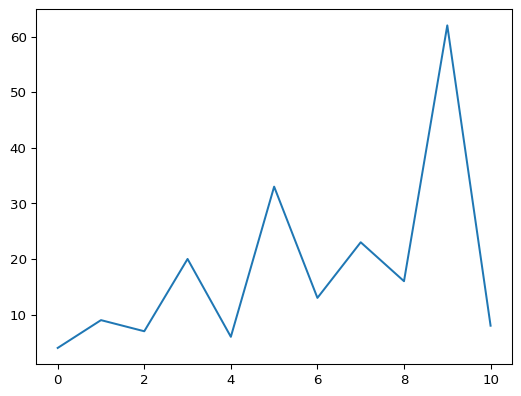

In [4]:
plt.plot(data);

The above plot should use the PNG format (which is the default):

In [5]:
%config InlineBackend.figure_formats

{'png'}

And it should use the correct DPI setting,
because the current directory contains
a [matplotlibrc](matplotlibrc) file containing the line ...

    figure.dpi: 96

... which should lead to the correct default value:

In [6]:
plt.rcParams['figure.dpi']

96.0

Matplotlib's original default value would be:

In [7]:
plt.rcParamsDefault['figure.dpi']

100.0

Let's temporarily change the default value:

In [8]:
plt.rcParams['figure.dpi'] = plt.rcParamsDefault['figure.dpi']

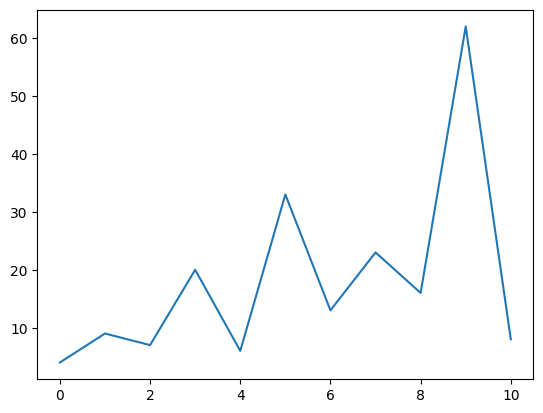

In [9]:
plt.plot(data);

For direct comparison, the correct DPI setting again:

In [10]:
plt.rcParams['figure.dpi'] = plt.rcParamsOrig['figure.dpi']

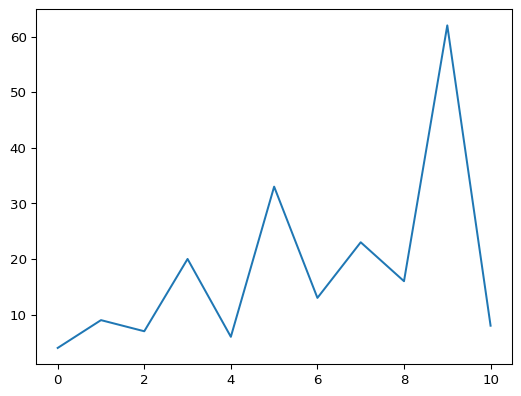

In [11]:
plt.plot(data);

Admittedly, the difference isn't huge, but it's clearly visible.

There is a separate DPI setting for saving a plot to a file.
By default, this should be the same as `'figure.dpi'`.

In [12]:
plt.rcParams['savefig.dpi']

'figure'

In [13]:
fig, ax = plt.subplots()
ax.plot(data)
fig.savefig('myfigure01.png')
plt.close(fig)

The [saved figure](myfigure01.png) can be used in a Markdown cell like this:

    ![an example plot](myfigure01.png)

And it should be shown here:

![an example plot](myfigure01.png)

You might notice that the saved image has a larger white margin around the figure than what is visible in the previous plots.
This is because by default, IPython uses the `'tight'` setting for `bbox_inches`.

If you prefer the additional white margin, you can set this to `None`:

In [14]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

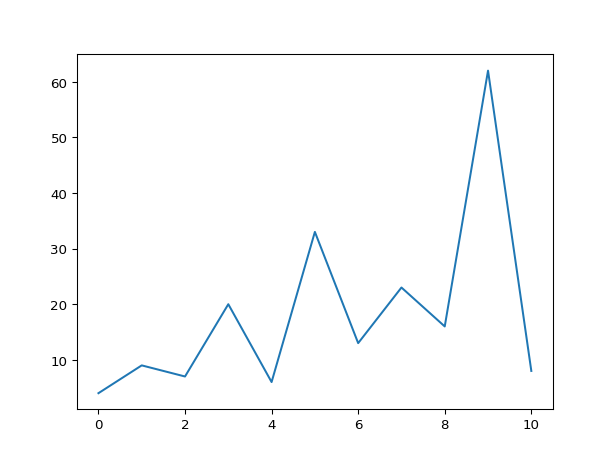

In [15]:
fig

That wastes too much space, so let's reset it:

In [16]:
%config InlineBackend.print_figure_kwargs = {}

So far we have used the default figure size:

In [17]:
plt.rcParams['figure.figsize']

[6.4, 4.8]

We can change the default figure size for the rest of this notebook
like this:

In [18]:
plt.rcParams['figure.figsize'] = 6, 3

Alternatively, we could also set this in our `matplotlibrc` file,
which would make it the default for all notebooks in the same directory:

    figure.figsize: 6, 3

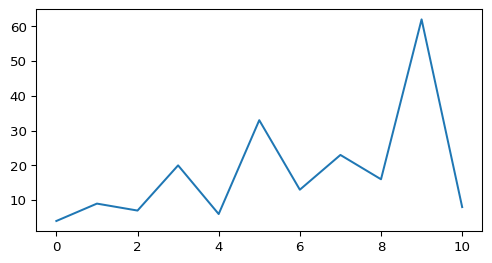

In [19]:
plt.plot(data);

We can use a different size for an individual figure
by using the `figsize` argument when creating the figure.

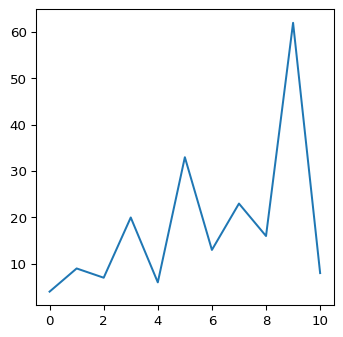

In [20]:
fig, ax = plt.subplots(figsize=[4, 4])
ax.plot(data);

The above plots all use the default figure format PNG.

We can force a different format using the `%config` magic like this:

In [21]:
%config InlineBackend.figure_formats = ['png2x']

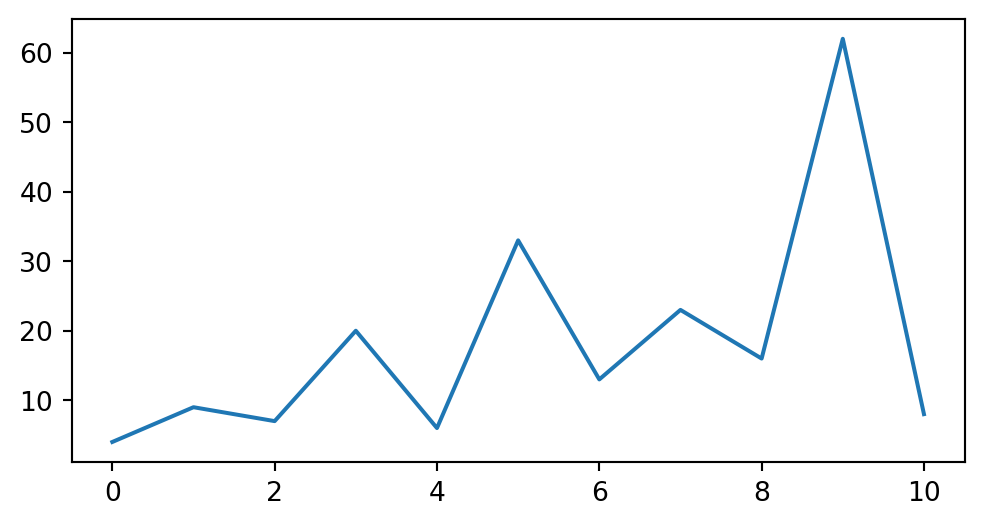

In [22]:
plt.plot(data);

Please note the use of `['png2x']` instead of `{'png2x'}`, which would cause a very non-obvious error,
see https://github.com/ipython/ipython/issues/10920.

This is still using the PNG format, but with doubled resolution,
which might look better on a HiDPI display.

The marketing term `'retina'` is just an alias for `'png2x'`:

In [23]:
%config InlineBackend.figure_formats = ['retina']

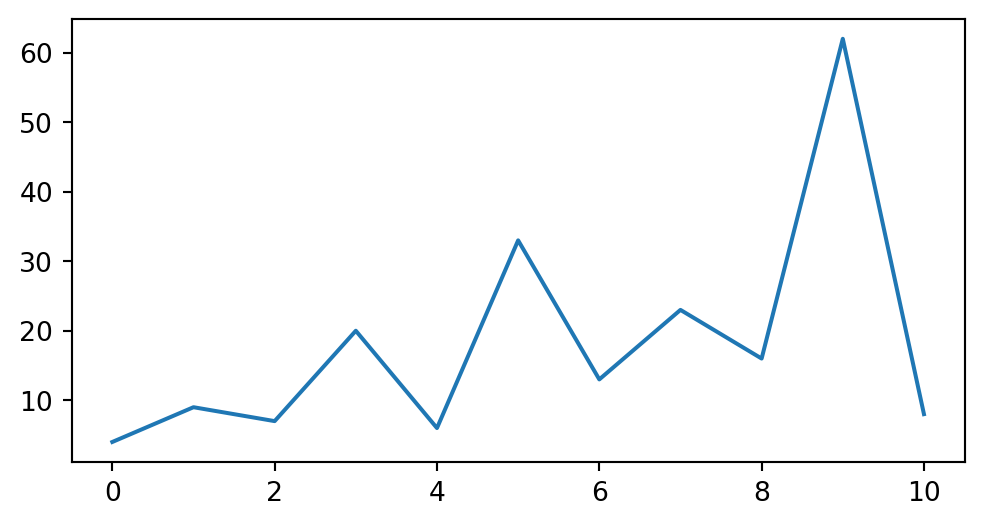

In [24]:
plt.plot(data);

We can specify more than one format, and the Jupyter client should display the most appropriate one.

In the following example we are using SVG (which should be shown in the browser) and PDF (which should be used when exporting to LaTeX/PDF).

In [25]:
%config InlineBackend.figure_formats = {'svg', 'pdf'}

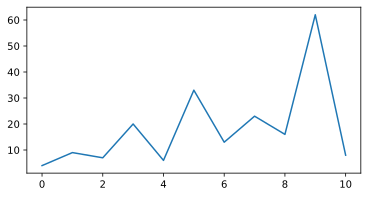

In [26]:
plt.plot(data);

For historical reference,
there are several old issues regarding plot sizes, resolutions and formats:

* Different DPI settings in Matplotlib vs. Jupyter notebook: https://github.com/matplotlib/matplotlib/issues/9217

* `%matplotlib inline` overwrites previous settings: https://github.com/ipython/ipython/issues/10383

* Matplotlib 2.0 changed `figsize` and DPI: https://github.com/ipython/ipython/issues/10128

* Different size than "notebook" backend: https://github.com/matplotlib/matplotlib/issues/4853

* IPython should use Matplotlib "theme":
  * https://github.com/ipython/ipython/issues/9710
  * https://github.com/ipython/ipykernel/issues/267

* `nbconvert` error with SVG when exporting to PDF/LaTeX:
  https://github.com/jupyter/nbconvert/issues/904,
  https://github.com/jupyter/nbconvert/issues/981
  * solved in https://github.com/jupyter/nbconvert/pull/985 (`nbconvert` version 5.5),
    see also https://github.com/jupyter/nbconvert/pull/910

* Wrong display priority on JupyterLab: https://github.com/jupyterlab/jupyterlab/issues/3038, https://github.com/jupyterlab/jupyterlab/issues/6222
  * solved in https://github.com/jupyterlab/jupyterlab/pull/6255 (JupyterLab version 1.1)

## Changing the Default Format

The default plotting format cannot be chosen via `matplotlibrc`,
but via your IPython configuration file.
Typically, this file is located at `~/.ipython/profile_default/ipython_kernel_config.py`.
In case of doubt, you can find your profile directory with this command:

    python3 -m IPython profile locate

In most cases, plots look best when using the SVG format.
To enable SVG plots, use this in your IPython configuration:

```python
c.InlineBackend.figure_formats = {'svg'}
```

If you also want to be able to export your notebooks to LaTeX/PDF,
you should enable PDF plots on top of that:

```python
c.InlineBackend.figure_formats = {'svg', 'pdf'}
```

If you are planning to save your SVG plots as part of your notebooks,
you should be aware that an SVG file typically contains a few auto-generated
(random-looking) IDs for cross-references between elements.
Whenever you re-execute your notebooks, the SVG plots will be re-generated
with new, seemingly random IDs.
This can be very annoying because the SVG content changes even if the plot itself doesn't change.
Luckily, since
[Matplotlib 2.0.0](https://matplotlib.org/users/prev_whats_new/whats_new_2.0.0.html#added-svg-hashsalt-key-to-rcparams)
there is a configuration parameter to control the generation of those IDs:
`svg.hashsalt`.
Just set it to whatever string you fancy, and all new IDs will be generated
deterministically based on this value.

```python
c.InlineBackend.figure_formats = {'svg'}
c.InlineBackend.rc = {'svg.hashsalt': 'python-audio'}
```

<div class="alert alert-warning">

The downside of this setting is that if more than one file is generated using deterministic identifiers and they end up as parts of one larger document, the identifiers can collide and cause the different parts to affect each other.

</div>

PDF plots have a similar non-determinism problem.
By default, a creation time-stamp is stored in the PDF plot,
which of course changes with each re-execution,
even if the plot itself didn't change at all.
To avoid this, you can disable the creation time-stamp
by setting `print_figure_kwargs`:

```python
c.InlineBackend.figure_formats = {'pdf'}
c.InlineBackend.print_figure_kwargs = {'metadata': {'CreationDate': None}}
```